<a href="https://colab.research.google.com/github/vnky21/Analisis-Data-Kampanye-Pemasaran-dan-Prediksi-Hasilnya/blob/main/Analisis_Data_Kampanye_Pemasaran_dan_Prediksi_Hasilnya%2C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Wrangling


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive_link = "https://docs.google.com/spreadsheets/d/1g5gsh7W41RjaO8KysHyJOpLIpX9NcdRN/edit?usp=sharing&ouid=106298287540954660387&rtpof=true&sd=true"

file_id = drive_link.split('/d/')[1].split('/')[0]
download_link = f"https://drive.google.com/uc?id={file_id}"

data = pd.read_excel(download_link)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
data.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data['job'].replace('admin.','admin',inplace=True)

<ipython-input-7-e7aa558a9aee>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['job'].replace('admin.','admin',inplace=True)


##Exploratory Data Analysis (EDA)

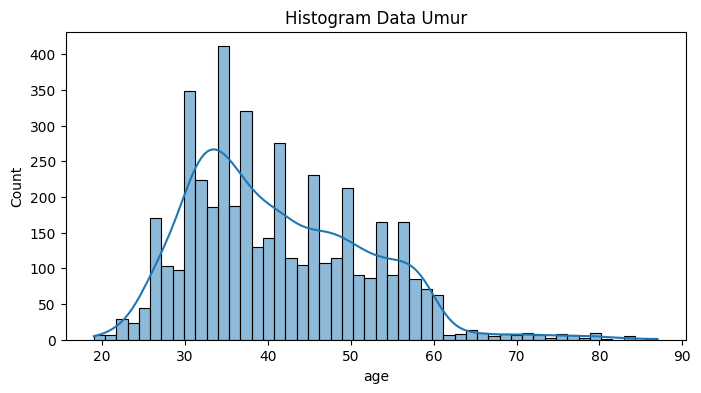

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data['age'], kde=True, bins=50)
plt.title(f"Histogram Data Umur")
plt.show()

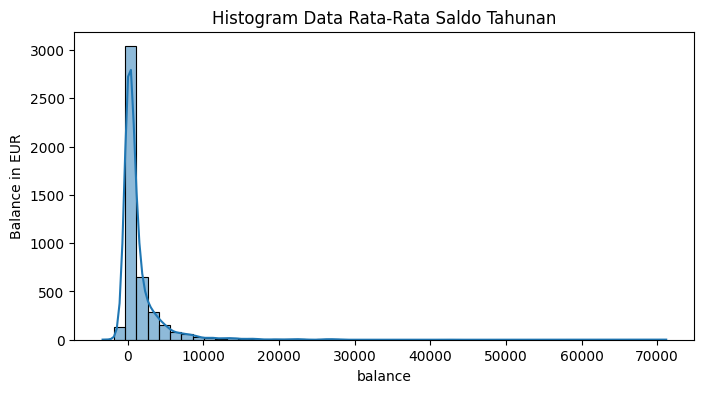

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data['balance'], kde=True, bins=50)
plt.ylabel("Balance in EUR")
plt.title(f"Histogram Data Rata-Rata Saldo Tahunan")
plt.show()

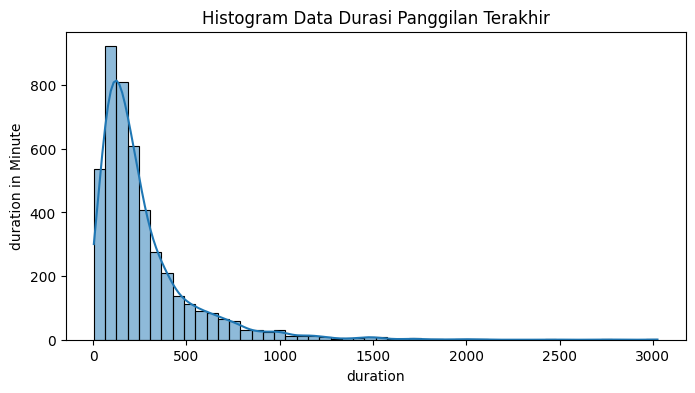

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data['duration'], kde=True, bins=50)
plt.ylabel("duration in Minute")
plt.title(f"Histogram Data Durasi Panggilan Terakhir")
plt.show()

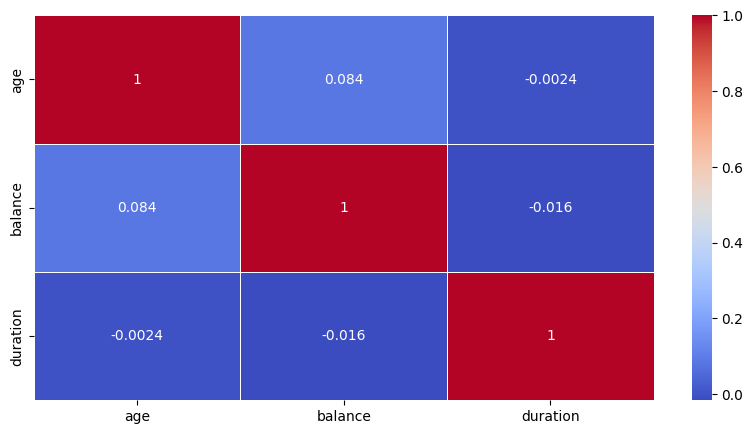

In [ ]:
corr_df = data[['age','balance','duration']].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr_df, cmap="coolwarm", annot=True, linewidths=0.5)
plt.show()

In [ ]:
data['age_category'] = data['age'].apply(lambda x : "Remaja" if x <= 25
                                         else "Dewasa" if x <= 45
                                         else "Lansia" if x <= 65
                                         else "Manula")
data.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_category
896,31,technician,single,secondary,yes,25,no,no,cellular,2,feb,381,1,-1,0,unknown,no,Dewasa
3235,32,blue-collar,single,secondary,no,53,yes,no,cellular,18,nov,276,1,195,1,failure,no,Dewasa
2692,34,management,married,tertiary,no,1310,no,no,telephone,30,jan,521,3,158,7,other,no,Dewasa
4209,38,services,married,secondary,no,0,no,yes,cellular,16,jul,1473,6,-1,0,unknown,no,Dewasa
983,37,technician,divorced,secondary,no,79,no,no,cellular,21,jul,191,1,-1,0,unknown,no,Dewasa


In [ ]:
age_data = data.groupby(by=['age_category','y']).agg(jumlah = ('age_category','count')).sort_values(by=['jumlah', 'age_category'], ascending=[False, True]).reset_index()



age_data


,age_category,y,jumlah
0,Dewasa,no,2626
1,Lansia,no,1234
2,Dewasa,yes,303
3,Lansia,yes,164
4,Remaja,no,88
5,Manula,no,52
6,Manula,yes,31
7,Remaja,yes,23


In [ ]:
age_with_data_yes = data[data['y'] == 'yes']['age_category'].value_counts().sort_values(ascending=False)

print("Jumlah Nasabah Yang Menyetujui Tawaran berdasarkan Kategori Umur")
age_with_data_yes

Jumlah Nasabah Yang Menyetujui Tawaran berdasarkan Kategori Umur


,count
age_category,
Dewasa,303
Lansia,164
Manula,31
Remaja,23


In [ ]:
job_with_data_yes = data.groupby(by=['job','y']).agg(
    count = ('job','count')
)
print("Jumlah Nasabah Yang Menyetujui Tawaran berdasarkan Kategori Pekerjaan")
job_with_data_yes

Jumlah Nasabah Yang Menyetujui Tawaran berdasarkan Kategori Pekerjaan


count
job           y         
admin         no     420
              yes     58
blue-collar   no     877
              yes     69
entrepreneur  no     153
              yes     15
housemaid     no      98
              yes     14
management    no     838
              yes    131
retired       no     176
              yes     54
self-employed no     163
              yes     20
services      no     379
              yes     38
student       no      65
              yes     19
technician    no     685
              yes     83
unemployed    no     115
              yes     13
unknown       no      31
              yes      7

In [ ]:
job_probability = data.groupby(by='job').agg(
    jumlah = ('job','count'),
    subscribed = ('y', lambda x : (x == 'yes').sum())
).reset_index()
job_probability['persentase'] = (job_probability['subscribed'] / job_probability['jumlah']) * 100

print("Jumlah yang berhasil menerima tawaran berdasarkan pekerjaan")
print(job_probability)

Jumlah yang berhasil menerima tawaran berdasarkan pekerjaan
              job  jumlah  subscribed  persentase
0           admin     478          58   12.133891
1     blue-collar     946          69    7.293869
2    entrepreneur     168          15    8.928571
3       housemaid     112          14   12.500000
4      management     969         131   13.519092
5         retired     230          54   23.478261
6   self-employed     183          20   10.928962
7        services     417          38    9.112710
8         student      84          19   22.619048
9      technician     768          83   10.807292
10     unemployed     128          13   10.156250
11        unknown      38           7   18.421053


In [ ]:
marital_and_housing = data.groupby(by=['marital','housing']).agg(
    jumlah = ('marital', 'count')
)
marital_and_housing = marital_and_housing.reset_index()
total_per_marital = marital_and_housing.groupby('marital')['jumlah'].sum()

# Hitung persentase untuk setiap baris
marital_and_housing['persentase'] = (
    (marital_and_housing['jumlah'] / total_per_marital) * 100
)

marital_and_housing

,marital,housing,jumlah,persentase
0,divorced,no,230,NaN
1,divorced,yes,298,NaN
2,married,no,1172,NaN
3,married,yes,1625,NaN
4,single,no,560,NaN
5,single,yes,636,NaN


In [ ]:
marital_and_housing = data.groupby(by=['marital', 'housing']).agg(
    jumlah=('marital', 'count')
).reset_index()

total_per_marital = marital_and_housing.groupby('marital')['jumlah'].sum()

marital_and_housing = marital_and_housing.merge(
    total_per_marital.rename("total_jumlah"), on='marital'
)

marital_and_housing['persentase'] = (
    marital_and_housing['jumlah'] / marital_and_housing['total_jumlah'] * 100
)
marital_and_housing

,marital,housing,jumlah,total_jumlah,persentase
0,divorced,no,230,528,43.560606
1,divorced,yes,298,528,56.439394
2,married,no,1172,2797,41.902038
3,married,yes,1625,2797,58.097962
4,single,no,560,1196,46.822742
5,single,yes,636,1196,53.177258


In [ ]:
education = data.groupby(by="education").agg(
    not_subscribed = ('y', lambda x: (x == 'no').sum()),
    subscribed = ('y', lambda x: (x == 'yes').sum()),
    total = ('education', 'count')
)

education['persentase'] = (education['subscribed'] / education['total']) * 100
education.sort_values(by="persentase", ascending=False).reset_index()

,education,not_subscribed,subscribed,total,persentase
0,tertiary,1157,193,1350,14.296296
1,secondary,2061,245,2306,10.624458
2,unknown,168,19,187,10.160428
3,primary,614,64,678,9.439528


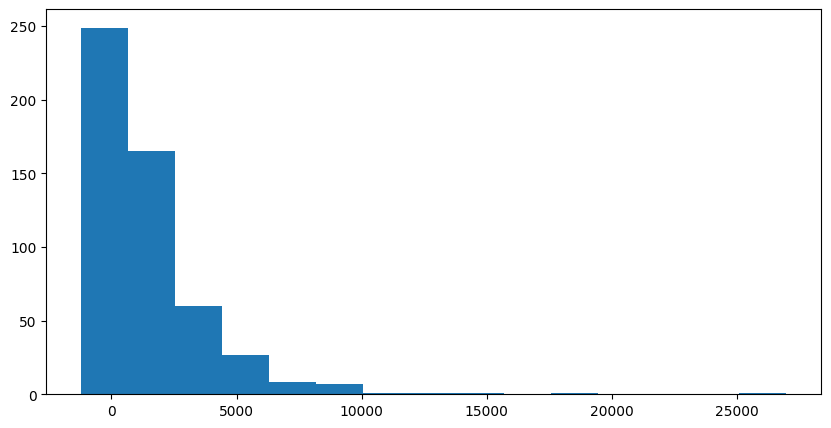

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(x=data['balance'][data['y'] == 'yes'], bins=15)
plt.show()

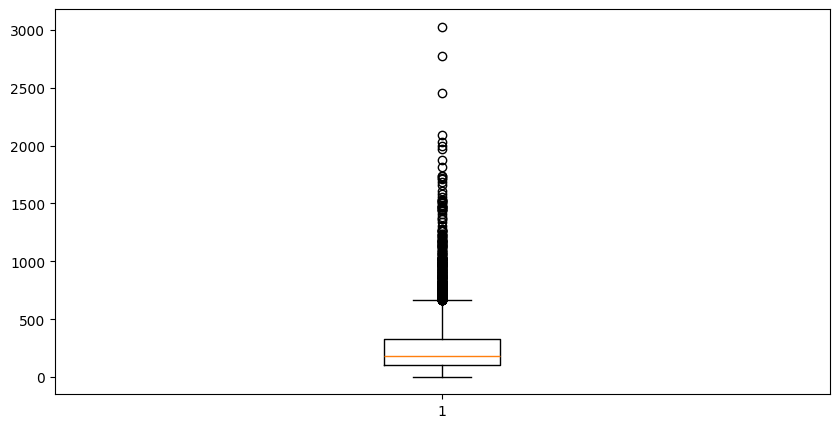

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(data['duration'])
plt.show()

In [ ]:
Q1 = data['duration'].quantile(0.25)
Q3 = data['duration'].quantile(0.75)
IQR = Q3 - Q1

batas_atas = Q3 + 1.25 * IQR
data_outlier = data[data['duration'] > batas_atas]

data_outlier.groupby(by='y').agg({'duration': 'count'})

,duration
y,
no,219
yes,188


In [ ]:
mean_yes = data['duration'][data['y'] == 'yes'].mean()
mean_no = data['duration'][data['y'] == 'no'].mean()

print('Rata-rata duration Yes : ', mean_yes)
print('Rata-rata duration No : ', mean_no)

Rata-rata duration Yes :  552.7428023032629
Rata-rata duration No :  226.3475


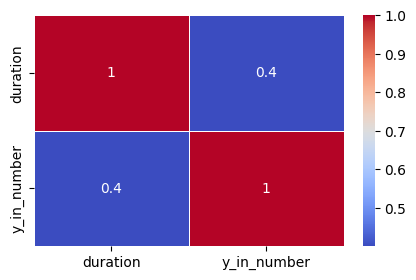

In [ ]:
data['y_in_number'] = data['y'].apply(lambda x: 1 if x == "yes" else 0)

plt.figure(figsize=(5, 3))
sns.heatmap(data[['duration','y_in_number']].corr(), cmap="coolwarm", annot=True, linewidths=0.5)
plt.show()

In [ ]:
poutcome_with_data_yes = data.groupby(by='poutcome').agg(
    subscribed = ('y', lambda x: (x == 'yes').sum()),
    not_subscribed = ('y', lambda x: (x == 'no').sum()),
    total = ('poutcome','count')
)

poutcome_with_data_yes['persentase berhasil'] = (poutcome_with_data_yes['subscribed']/poutcome_with_data_yes['total']) * 100
poutcome_with_data_yes

,subscribed,not_subscribed,total,persentase berhasil
poutcome,,,,
failure,63,427,490,12.857143
other,38,159,197,19.289340
success,83,46,129,64.341085
unknown,337,3368,3705,9.095816


In [ ]:
poutcome_with_data_yes2 = data.groupby(by=['poutcome','y']).agg(
    jumlah = ('poutcome', 'count')
)

jumlah_y = poutcome_with_data_yes2.groupby(level=0)['jumlah'].sum()
poutcome_with_data_yes2['persentase'] = (poutcome_with_data_yes2.loc[(slice(None),'yes'),'jumlah']
                                             / jumlah_y) * 100
poutcome_with_data_yes2.reset_index(inplace=True)

In [ ]:
bulan_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

data['month_numeric'] = data['month'].map(bulan_mapping)

contact_and_month = data.groupby(by=['contact','month_numeric']).agg(
    jumlah = ('contact','count'),
    yes = ('y', lambda x: (x=='yes').sum())
).sort_values(by=['contact','month_numeric'], ascending=True)

contact_and_month['persentase_yes'] = (contact_and_month['yes']/contact_and_month['jumlah']) * 100
contact_and_month.reset_index(inplace=True)

contact_and_month

,contact,month_numeric,jumlah,yes,persentase_yes
0,cellular,1,129,14,10.852713
1,cellular,2,199,36,18.090452
2,cellular,3,38,16,42.105263
3,cellular,4,276,53,19.202899
4,cellular,5,529,57,10.775047
5,cellular,6,73,31,42.465753
6,cellular,7,576,49,8.506944
7,cellular,8,607,73,12.026359
8,cellular,9,42,14,33.333333
9,cellular,10,64,29,45.312500


##Data Visualitation

###Demografi dan Karakteristik Pelanggan

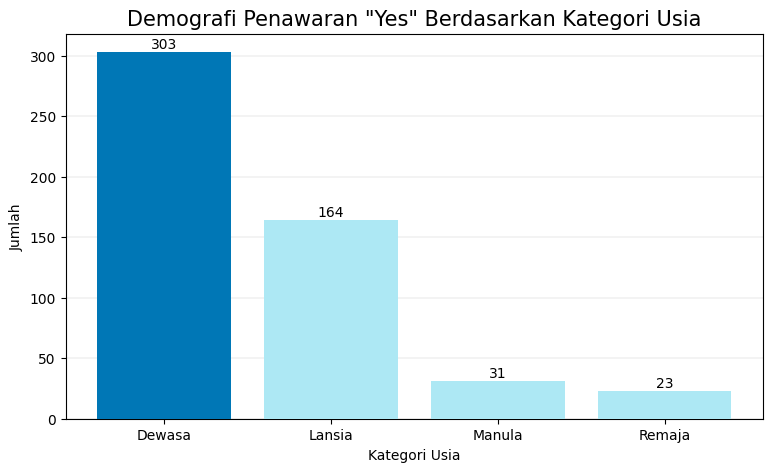

In [ ]:
age_data_yes = age_data[age_data['y'] == 'yes']
plt.figure(figsize=(9,5))
for i, v in enumerate(age_data_yes['jumlah']):
    plt.text(i, v + 3, str(v), ha='center', fontsize=10, zorder=4)
plt.bar(
    x=age_data_yes['age_category'],
    height=age_data_yes['jumlah'],
    color= ["#0077b6" if x == age_data_yes['jumlah'].max() else "#ade8f4" for x in age_data_yes['jumlah']],
    zorder=3
    )
plt.grid(axis='y', zorder=0, linewidth=0.2)
plt.ylabel('Jumlah')
plt.xlabel('Kategori Usia')
plt.title('Demografi Penawaran "Yes" Berdasarkan Kategori Usia', fontsize=15)
plt.show()

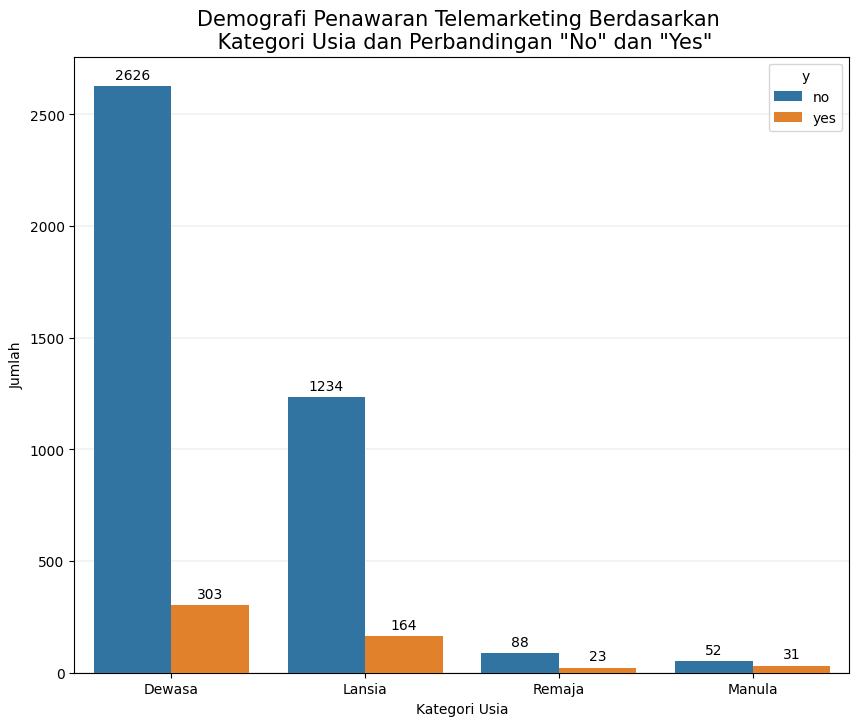

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data=age_data, x='age_category', y='jumlah', hue='y', zorder=3)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
      ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        fontsize=10, color='black',
        xytext=(0, 8), textcoords='offset points'
    )
plt.grid(axis='y', zorder=0, linewidth=0.2)
plt.ylabel('Jumlah')
plt.xlabel('Kategori Usia')
plt.title('Demografi Penawaran Telemarketing Berdasarkan \n Kategori Usia dan Perbandingan "No" dan "Yes"', fontsize=15)
plt.show()

###Pekerjaan dan Keputusan Berlangganan

<ipython-input-126-5583817b9b9c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


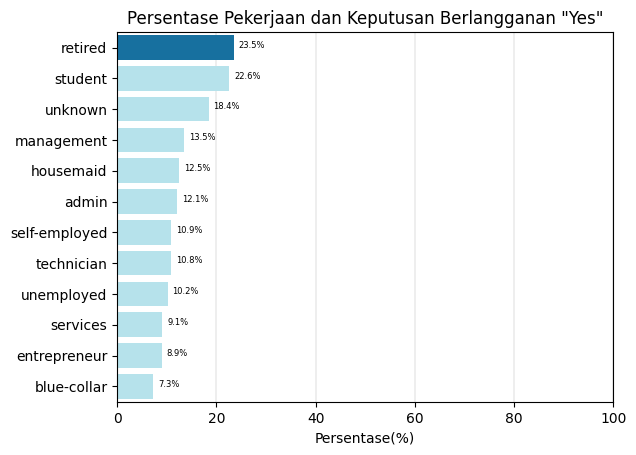

In [ ]:
job_sort = job_probability.sort_values(by='persentase', ascending=False)
colors = ['#0077b6' if x == job_sort['persentase'].max() else '#ade8f4' for x in job_sort['persentase']]
sns.barplot(
    data=job_sort,
    x='persentase',
    y='job',
    orient='h',
    palette=colors,
    zorder=2
)
for i, v in enumerate(job_sort['persentase']):
    plt.text(v + 1, i, f'{v:.1f}%', ha='left', fontsize=6, zorder=4)

plt.xlim(0, 100)
plt.grid(axis='x', zorder=0,linewidth=0.3)
plt.xlabel('Persentase(%)')
plt.ylabel('')
plt.title('Persentase Pekerjaan dan Keputusan Berlangganan "Yes"')

plt.show()

###Status Pernikahan dan Pinjaman Perumahan

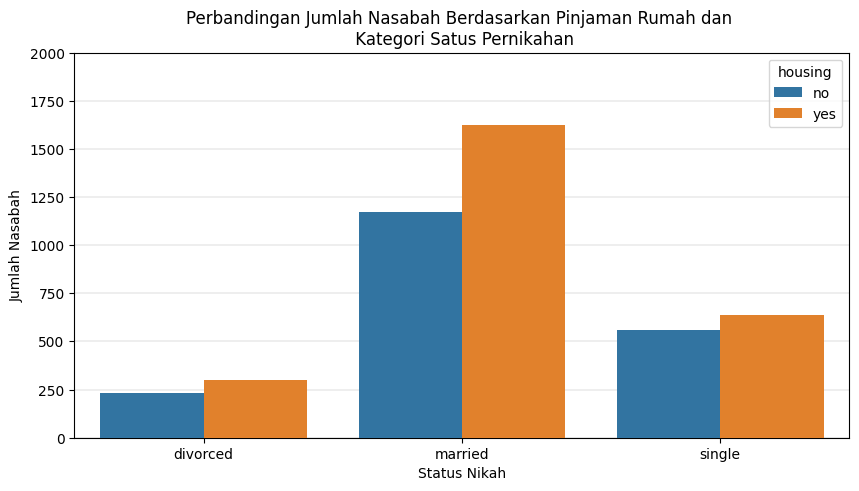

In [ ]:
plt.figure(figsize=(10,5))

sns.barplot(
    data=marital_and_housing,
    x='marital',
    y='jumlah',
    hue='housing',
    zorder=3
)
plt.grid(axis='y', linewidth=0.3,zorder=0)
plt.ylim(0, 2000)
plt.xlabel('Status Nikah')
plt.ylabel('Jumlah Nasabah')
plt.title('Perbandingan Jumlah Nasabah Berdasarkan Pinjaman Rumah dan \n Kategori Satus Pernikahan')

plt.show()

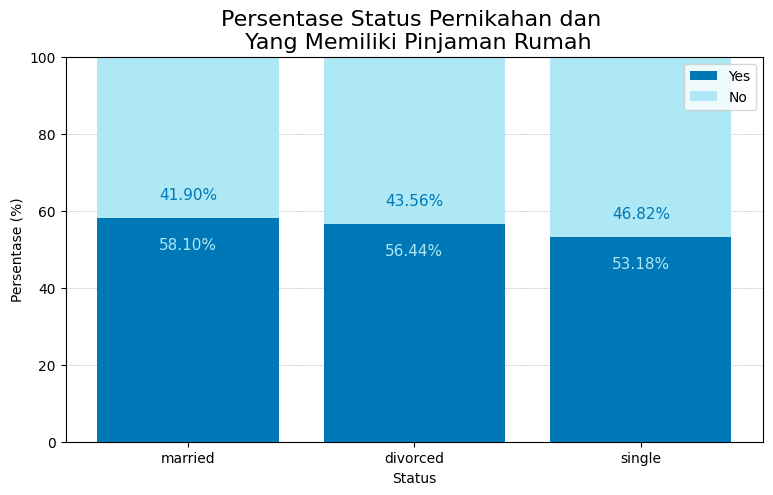

In [ ]:
filter_yes = marital_and_housing[marital_and_housing['housing'] == 'yes'].sort_values(by='persentase', ascending=False)
filter_no = marital_and_housing[marital_and_housing['housing'] == 'no'].sort_values(by='persentase', ascending=True)

plt.figure(figsize=(9,5))
plt.bar(
    filter_yes['marital'],
    filter_yes['persentase'],
    color = '#0077b6',
    zorder=3
)
plt.bar(
    filter_no['marital'],
    filter_no['persentase'],
    bottom=filter_yes['persentase'],
    color= '#ade8f4',
    zorder=2
)

for i,v in enumerate(filter_yes['persentase']):
  plt.text(i, v - 8, f'{v:.2f}%', ha='center', fontsize=11, color="#ade8f4")

for i,v in enumerate(filter_no['persentase']):
  plt.text(i, (100 - v) + 5 , f'{v:.2f}%', ha='center', fontsize=11, color="#0077b6")

plt.ylim(0, 100)
plt.grid(axis='y', zorder=0, linewidth=0.4, linestyle='--')
plt.legend(['Yes','No'])
plt.xlabel('Status')
plt.ylabel('Persentase (%)')
plt.title('Persentase Status Pernikahan dan \n Yang Memiliki Pinjaman Rumah', fontsize=16)

plt.show()

###Pendidikan Dan Persetujuan Berlangganan

<ipython-input-33-1267dfbde026>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


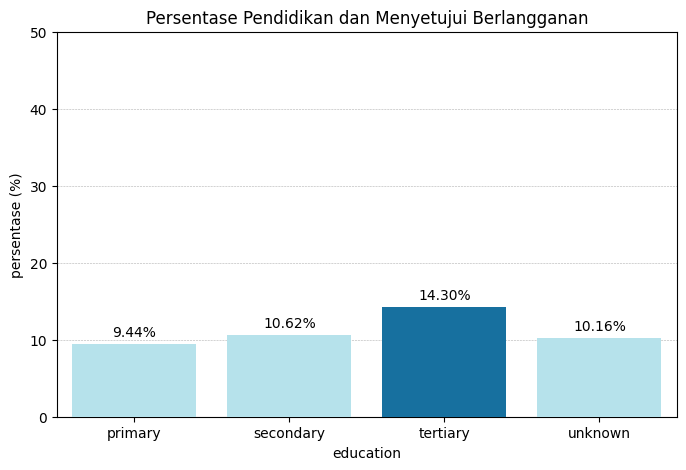

In [ ]:
colors = ['#0077b6' if x == education['persentase'].max() else '#ade8f4' for x in education['persentase']]
plt.figure(figsize=(8,5))
sns.barplot(
    data=education,
    x = "education",
    y = "persentase",
    palette = colors,
    zorder = 3
)
for i,v in enumerate(education['persentase']):
  plt.text(i, v + 1, f'{v:.2f}%', fontsize=10, ha='center')

plt.ylim(0, 50)
plt.grid(axis='y', linewidth=0.4, linestyle='--', zorder=0)
plt.ylabel('persentase (%)')
plt.title('Persentase Pendidikan dan Menyetujui Berlangganan', fontsize=12)
plt.show()

###Kondisi Keuangan dan Keputusan Berlangganan

In [ ]:
balance_yes = data['balance'][data['y'] == 'yes']
balance_no = data['balance'][data['y'] == 'no']

balance = pd.DataFrame({
    'y' : ['Yes','No'],
    'mean' : [balance_yes.mean(), balance_no.mean()],
    'std' : [balance_yes.std(), balance_no.std()]
})

balance

,y,mean,std
0,Yes,1571.955854,2444.398956
1,No,1403.211750,3075.349313


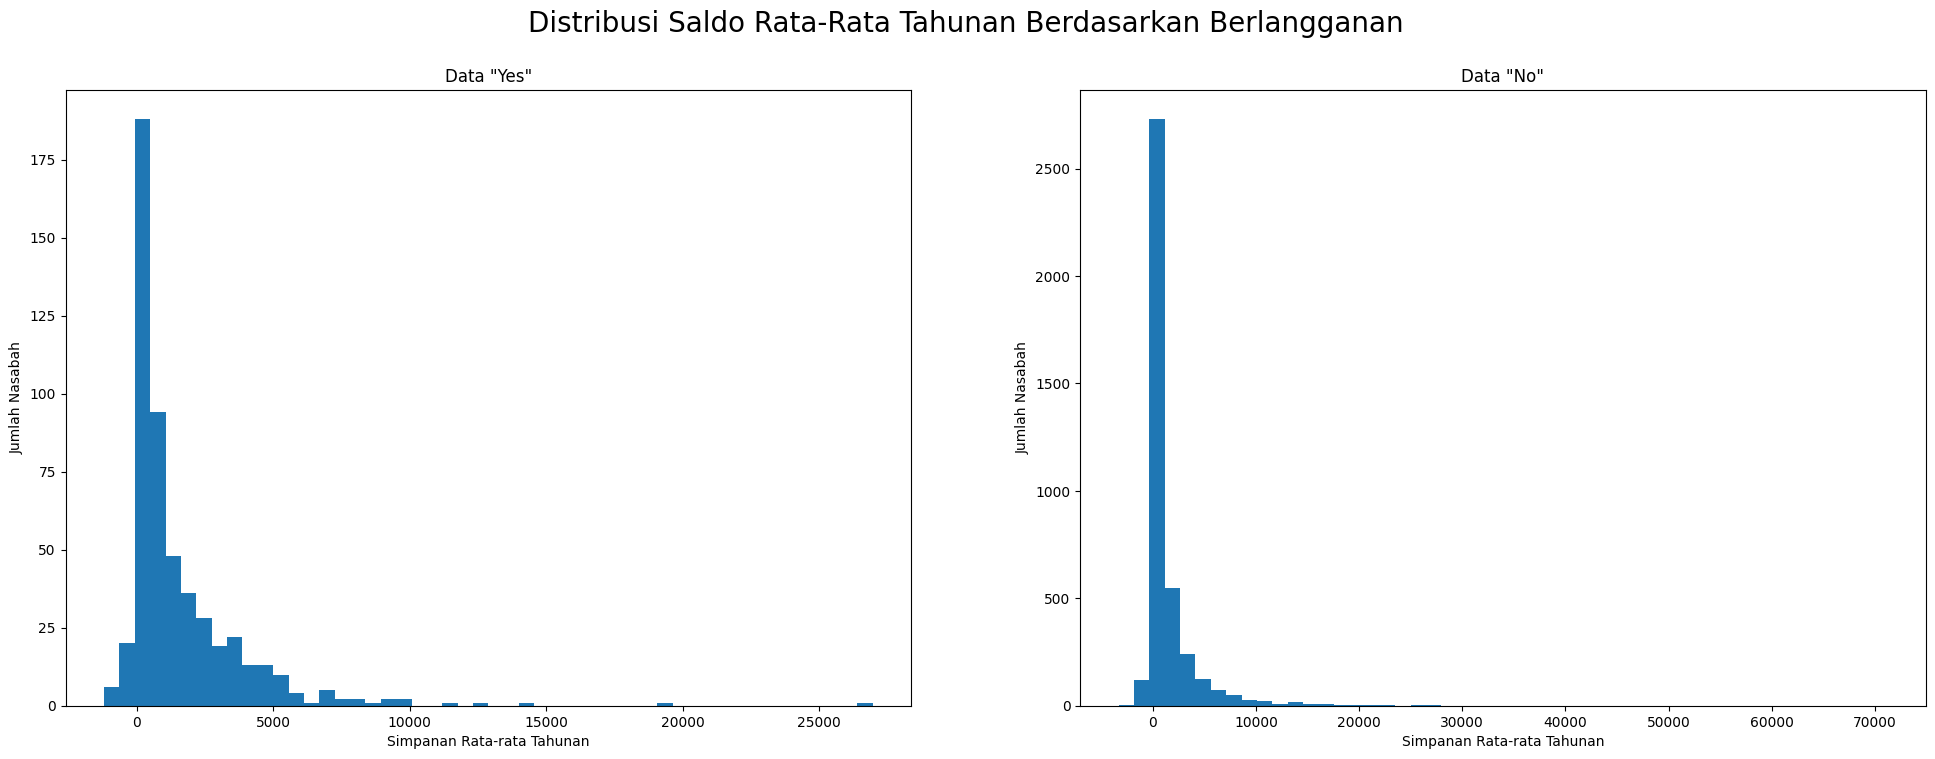

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

ax[0].hist(
    x=data['balance'][data['y'] == 'yes'],
    bins=50
    )
ax[0].set_ylabel('Jumlah Nasabah')
ax[0].set_xlabel('Simpanan Rata-rata Tahunan')
ax[0].set_title('Data "Yes"')

ax[1].hist(
    x=data['balance'][data['y'] == 'no'],
    bins=50
    )
ax[1].set_ylabel('Jumlah Nasabah')
ax[1].set_xlabel('Simpanan Rata-rata Tahunan')
ax[1].set_title('Data "No"')


plt.suptitle("Distribusi Saldo Rata-Rata Tahunan Berdasarkan Berlangganan", fontsize=20)
plt.show()

###Durasi dan Efektivitas Kampanye

In [ ]:
duration = data.groupby(by='y').agg(
    jumlah = ('y','count'),
    mean_duration = ('duration','mean')

).reset_index()

duration

,y,jumlah,mean_duration
0,no,4000,226.347500
1,yes,521,552.742802


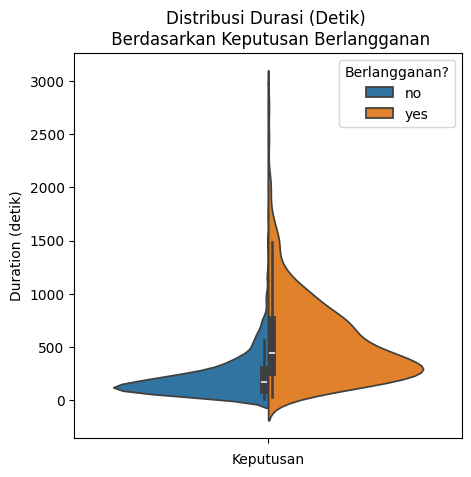

In [ ]:
plt.figure(figsize=(5,5))
sns.violinplot(
    data=data,
    y='duration',
    hue='y',
    split=True
)
plt.xlabel('Keputusan')
plt.ylabel('Duration (detik)')
plt.legend(title='Berlangganan?')
plt.title('Distribusi Durasi (Detik) \n Berdasarkan Keputusan Berlangganan')
plt.show()

In [ ]:
mean_yes_seconds = duration['mean_duration'][duration['y'] == 'yes']
mean_no_seconds = duration['mean_duration'][duration['y'] == 'no']

mean_yes_minutes = mean_yes_seconds // 60
mean_yes_seconds_remain = mean_yes_seconds % 60

mean_no_minutes = mean_no_seconds // 60
mean_no_seconds_remain = mean_no_seconds % 60

print(f'Rata-rata duration Yes: {int(mean_yes_minutes.iloc[0])} Menit {int(mean_yes_seconds_remain.iloc[0])} Detik')
print(f'Rata-rata duration No: {int(mean_no_minutes.iloc[0])} Menit {int(mean_no_seconds_remain.iloc[0])} Detik')



Rata-rata duration Yes: 9 Menit 12 Detik
Rata-rata duration No: 3 Menit 46 Detik


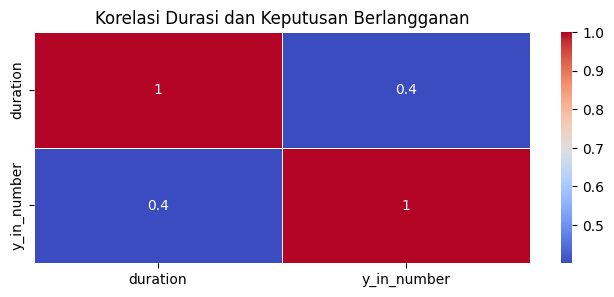

In [ ]:
data['y_in_number'] = data['y'].apply(lambda x: 1 if x == "yes" else 0)

plt.figure(figsize=(8, 3))
sns.heatmap(data[['duration','y_in_number']].corr(), cmap="coolwarm", annot=True, linewidths=0.5)
plt.title('Korelasi Durasi dan Keputusan Berlangganan')
plt.show()

In [ ]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(data['duration'], data['y_in_number'])
print(f'Korelasi Pearson: {corr}')
print(f'P-value: {p_value}')


Korelasi Pearson: 0.40111830327524
P-value: 2.150444902162957e-174


###Hasil Kampanye Sebelumnya Dan Keputusan Berlangganan

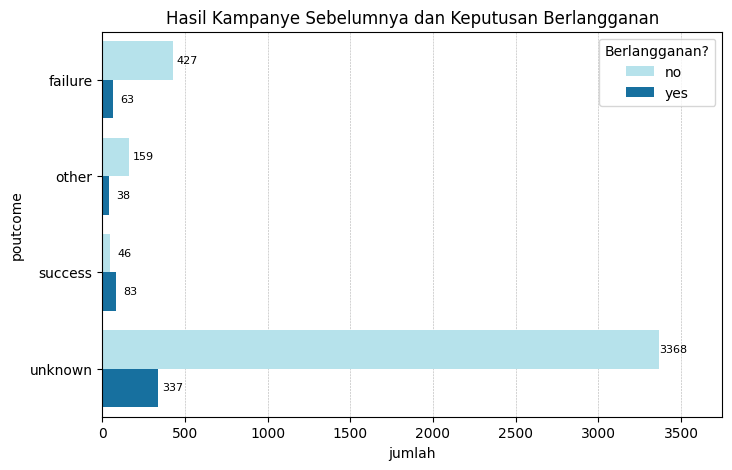

In [ ]:
plt.figure(figsize=(8,5))

ax = sns.barplot(
    data=poutcome_with_data_yes2,
    x='jumlah',
    y='poutcome',
    hue='y',
    orient='h',
    zorder=2,
    palette = ['#ade8f4', '#0077b6']
)

for p in ax.patches:
    width = p.get_width()
    if width > 0:
      ax.annotate(
        f'{int(p.get_width())}',
        ( width + 80., p.get_y() + p.get_height() / 2),
        ha='center', va='center',
        fontsize=8, color='black',
        xytext=(1, 0), textcoords='offset points'
)

plt.xlim(0,3750)
plt.legend(title='Berlangganan?')
plt.grid(axis='x',linewidth=0.4, linestyle='--',zorder=0)
plt.title('Hasil Kampanye Sebelumnya dan Keputusan Berlangganan')
plt.show()

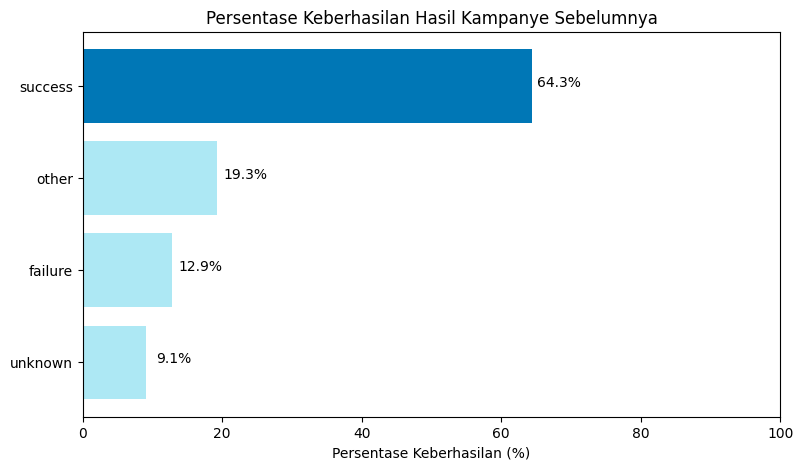

In [ ]:
poutcome_yes = poutcome_with_data_yes2[poutcome_with_data_yes2['y'] == 'yes'].sort_values(by='persentase', ascending=True)
colors = ['#0077b6' if x == poutcome_yes['persentase'].max() else '#ade8f4' for x in poutcome_yes['persentase']]

plt.figure(figsize=(9,5))
plt.barh(
    poutcome_yes['poutcome'],
    poutcome_yes['persentase'],
    color = colors
    )

for i,v in enumerate(poutcome_yes['persentase']):
    plt.text(v + 4, i, f'{v:.1f}%', ha='center', fontsize=10)

plt.xlabel('Persentase Keberhasilan (%)')
plt.title('Persentase Keberhasilan Hasil Kampanye Sebelumnya')
plt.xlim(0,100)
plt.show()

###Strategi Kontak yang Efektif

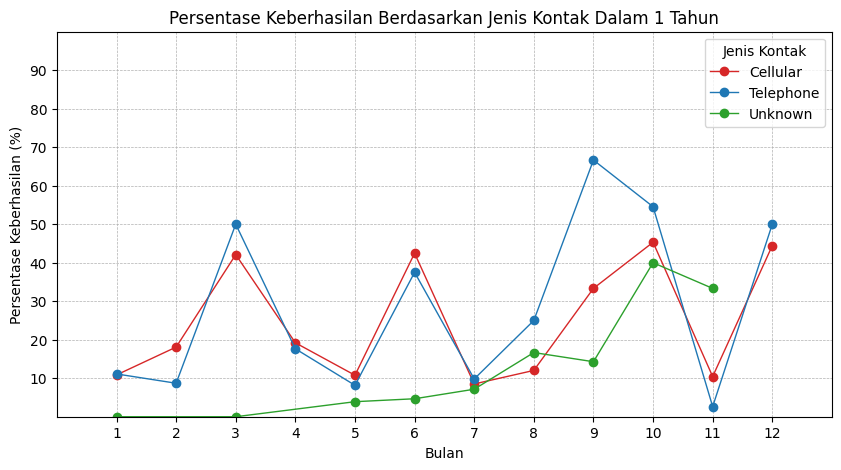

In [ ]:
cellular = contact_and_month[contact_and_month['contact'] == 'cellular']
telephone = contact_and_month[contact_and_month['contact'] == 'telephone']
unknown = contact_and_month[contact_and_month['contact'] == 'unknown']

plt.figure(figsize=(10,5))
plt.plot(cellular['month_numeric'],cellular['persentase_yes'], linewidth=1, label='Cellular', marker = 'o', color='tab:red' )
plt.plot(telephone['month_numeric'],telephone['persentase_yes'],linewidth=1, label='Telephone', marker = 'o', color='tab:blue' )
plt.plot(unknown['month_numeric'],unknown['persentase_yes'],linewidth=1, label='Unknown', marker = 'o', color='tab:green' )

plt.ylim(0,100)
plt.xlim(0,13)
plt.xticks(range(1, 13, 1))
plt.yticks(range(10, 100, 10))
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
plt.xlabel('Bulan')
plt.ylabel('Persentase Keberhasilan (%)')
plt.title('Persentase Keberhasilan Berdasarkan Jenis Kontak Dalam 1 Tahun')
plt.legend(title='Jenis Kontak')

plt.show()